In [3]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# fake data
# use torch.unsqueeze() to add one more dimension as 100x1
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)

In [11]:
y = x.pow(2) + 0.2*torch.rand(x.size())

In [12]:
x, y = Variable(x), Variable(y)

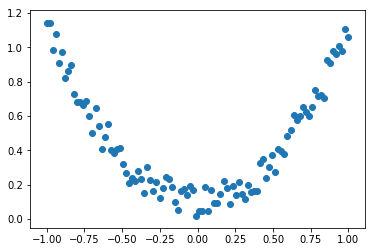

In [13]:
# to visualize data using scatter plot
plt.scatter(x.data.numpy(), y.data.numpy())

In [15]:
class Net(torch.nn.Module):
    # each layer information
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    # define the building of network
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x 
        

In [16]:
net = Net(1,10,1)
print(net)

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


In [19]:
# optimize manner
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

In [24]:
# training
# train 100 steps
for t in range(100):
    prediction = net(x)
    # prediction at 1st argument, gt at 2nd argument
    loss = loss_func(prediction, y)
    # three steps for optim
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [27]:
x.data.size()

torch.Size([100, 1])

In [33]:
%matplotlib inline

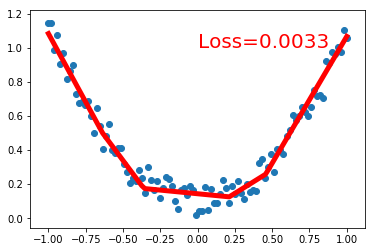

In [34]:
# visualize
plt.ion() # something about plotting, let it be able in  real-time plotting

for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0, 1.0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        #plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()

In [30]:
loss.data.size()

torch.Size([1])